# Vector Multiplication
Vector multiplication can be performed in three ways:

- Scalar Multiplication
- Dot Product Multiplication
- Cross Product Multiplication

## Scalar Multiplication
Let's start with *scalar* multiplication - in other words, multiplying a vector by a single numeric value.

Suppose I want to multiply my vector by 2, which I could write like this:

\begin{equation} \vec{w} = 2\vec{v}\end{equation}

Note that the result of this calculation is a new vector named **w**. So how would we calculate this?
Recall that **v** is defined like this:

\begin{equation}\vec{v} = \begin{bmatrix}2 \\ 1 \end{bmatrix}\end{equation}

To calculate 2v, we simply need to apply the operation to each dimension value in the vector matrix, like this:

\begin{equation}\vec{w} = \begin{bmatrix}2 \cdot 2 \\  2 \cdot 1 \end{bmatrix}\end{equation}

Which gives us the following result:

\begin{equation}\vec{w} = \begin{bmatrix}2 \cdot 2 \\  2 \cdot 1 \end{bmatrix} = \begin{bmatrix}4 \\ 2 \end{bmatrix}\end{equation}

In r, you can apply these sort of matrix operations directly to arrays and numeric columns in data frames, so we can simply calculate **w** like this:

  x y
2 4 2


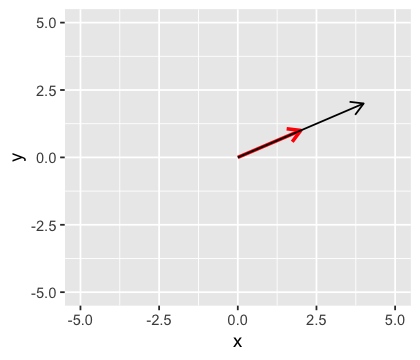

In [24]:
library(ggplot2)
library(NISTunits) # Libary to work netween degrees and radians
library(repr)
options(repr.plot.width=3.5, repr.plot.height=3) # Set the initial plot area dimensions

## data frame for origin and end of vector
v = data.frame(x = c(0,2), y = c(0,1))

## Element-wise multiply the vector by 2
w = 2 * v
print(w[2, ])

## Plot the vector
ggplot() + 
      geom_line(data = v, aes(x,y), arrow = arrow(length=unit(0.30,"cm")), color = 'red', size = 1) + 
      geom_line(data = w, aes(x,y), arrow = arrow(length=unit(0.30,"cm")), size = 0.5) +
      xlim(-5,5) + ylim(-5,5)

The same approach is taken for scalar division.

Try it for yourself - use the cell below to calculate a new vector named **b** based on the following definition:

\begin{equation}\vec{b} = \frac{\vec{v}}{2}\end{equation}

  x   y
2 1 0.5


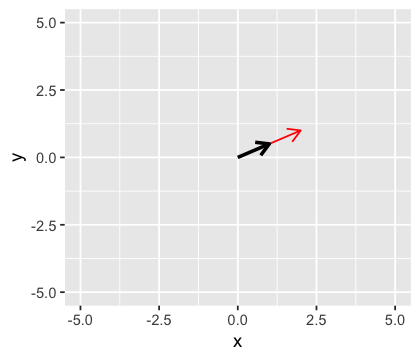

In [3]:
b = v / 2
print(b[2,])

# Plot b
## Plot the vector
ggplot() + 
      geom_line(data = v, aes(x,y), arrow = arrow(length=unit(0.30,"cm")), color = 'red') + 
      geom_line(data = b, aes(x,y), arrow = arrow(length=unit(0.30,"cm")), size = 1) +
      xlim(-5,5) + ylim(-5,5)

## Dot Product Multiplication
So we've seen how to multiply a vector by a scalar. How about multiplying two vectors together? There are actually two ways to do this depending on whether you want the result to be a *scalar product* (in other words, a number) or a *vector product* (a vector).

To get a scalar product, we calculate the *dot product*. This takes a similar approach to multiplying a vector by a scalar, except that it multiplies each component pair of the vectors and sums the results. To indicate that we are performing a dot product operation, we use the &bull; operator:

\begin{equation} \vec{v} \cdot \vec{s} = (v_{1} \cdot s_{1}) + (v_{2} \cdot s_{2}) ... + \; (v_{n} \cdot s_{n})\end{equation}

So for our vectors **v** (2,1) and **s** (-3,2), our calculation looks like this:

\begin{equation} \vec{v} \cdot \vec{s} = (2 \cdot -3) + (1 \cdot 2) = -6 + 2 = -4\end{equation}

So the dot product, or scalar product, of **v** &bull; **s** is **-4**.

*****
**Note:** In R you can take a dot project as the sum of the matrix multiplication of one vector by the transpose of the other using the **%*%** operator. The multiplication gives an array with one non-zero element and the sum gives the scalar result. 
****

Execute the code in the cell below to see the result:

In [16]:
## Another data frame s
s = data.frame(x = c(0,-3), y = c(0,2))

dot_v_s = sum(as.matrix(v) %*% as.matrix(t(s)))
dot_v_s

ERROR: Error in as.matrix(v) %*% as.matrix(t(s)): non-conformable arguments


In [28]:
as.matrix(v)
as.matrix(t(s))

x,y
0,0
2,1


x,0,-3
y,0,2


The zeros are only being added for plotting. A cleaner way to do this would be:

In [6]:
v = c(2, 1)
s = c(-3, 2)

t(v) %*% s
# order like this
crossprod(v, s)

-4


-4


Note if you do the transpose the other way it gives you.  

In [31]:
v %*% t(s)

-6,4
-3,2


This is because because with matrix multiplication (see Lab 03-04) we multiple the 1st row of the left-hand side by the 1st column right-hand side and sum to get the first element $[1, 1]$ of the resultant matrix. Element $[1, 2]$ is then the 1st row of LHS multiplied by the 2nd col of RHS and summed etc. etc.

In the first case 
    
$$ \begin{equation}\vec{v^T} = \begin{bmatrix}2 & 1 \end{bmatrix} \end{equation}$$

and

$$ \begin{equation}\vec{s} = \begin{bmatrix}-3 \\ 2 \end{bmatrix}\end{equation} $$

The first row is then $\begin{bmatrix}2 & 1 \end{bmatrix}$, which we multiple by the first column $\begin{bmatrix}-3 \\ 2 \end{bmatrix}$, and then sum to get the single value $-4$.

In the second case, 

$$ \begin{equation}\vec{v} = \begin{bmatrix}2 \\ 1 \end{bmatrix} \end{equation}$$

and

$$ \begin{equation}\vec{s^T} = \begin{bmatrix}-3 & 2 \end{bmatrix}\end{equation} $$

This means the first row of $v$ is $2$ and the first column of $s$ is $-3$. We multiple these and sum to get $-6$, and continue for the other 4 combinations.

### The Cosine Rule
An useful property of vector dot product multiplication is that we can use it to calculate the cosine of the angle between two vectors. We could write the dot products as:

$$ \vec{v} \cdot \vec{s} = \|\vec{v} \|\|\vec{s}\| \cos (\theta) $$ 

Which we can rearrange as:

$$ \cos(\theta) = \frac{\vec{v} \cdot \vec{s}}{\|\vec{v} \|\|\vec{s}\|} $$

So for our vectors **v** (2,1) and **s** (-3,2), our calculation looks like this:

$$ \cos(\theta) = \frac{(2 \cdot-3) + (-3 \cdot 2)}{\sqrt{2^{2} + 1^{2}} \times \sqrt{-3^{2} + 2^{2}}} $$

So:

$$\cos(\theta) = \frac{-4}{8.0622577483}$$

Which calculates to:

$$\cos(\theta) = -0.496138938357 $$

So:

$$\theta \approx 119.74 $$

Here's that calculation in R:

In [ ]:
norm_v = norm(v, '2')
norm_s = norm(s, '2')

cos_v_s = dot_v_s/(norm_v*norm_s)
NISTradianTOdeg(acos(cos_v_s))

## Cross Product Multiplication
To get the *vector product* of multiplying two vectors together, you must calculate the *cross product*. The result of this is a new vector that is at right angles to both the other vectors in 3D Euclidean space. This means that the cross-product only really makes sense when working with vectors that contain three components.

Note, this is a specific geometric definition of cross product for 3D space. This is not the definition used by R, e.g. for the crossprod() function. R uses the statistical definition, which is standard matrix multiplication. As the help page for crossprod() says, it's just short for `t(x) %*% y`

For example, let's suppose we have the following vectors:

\begin{equation}\vec{p} = \begin{bmatrix}2 \\ 3 \\ 1 \end{bmatrix}\;\; \vec{q} = \begin{bmatrix}1 \\ 2 \\ -2 \end{bmatrix}\end{equation}

To calculate the cross product of these vectors, written as **p** x **q**, we need to create a new vector (let's call it **r**) with three components (r<sub>1</sub>, r<sub>2</sub>, and r<sub>3</sub>). The values for these components are calculated like this:

\begin{equation}r_{1} = p_{2}q_{3} - p_{3}q_{2}\end{equation}
\begin{equation}r_{2} = p_{3}q_{1} - p_{1}q_{3}\end{equation}
\begin{equation}r_{3} = p_{1}q_{2} - p_{2}q_{1}\end{equation}

So in our case:

\begin{equation}\vec{r} = \vec{p} \times \vec{q} = \begin{bmatrix}(3 \cdot -2) - (1 \cdot 2) \\ (1 \cdot 1) - (2 \cdot -2) \\ (2 \cdot 2) - (3 \cdot 1) \end{bmatrix} = \begin{bmatrix}-6 - 2 \\ 1 - -4 \\ 4 - 3 \end{bmatrix} = \begin{bmatrix}-8 \\ 5 \\ 1 \end{bmatrix}\end{equation}

In R you can use the **cross** function to compute the outer cross product of two vector arrays:

In [1]:
## Need the cross function from the pracma package
install.packages('pracma')
library(pracma)

## Define the two vectors
p = c(2,3,1)
q = c(1,2,-2)

## Outer cross product of two vectors
cat('\nCross product of vectors')
cross(p,q)

Installing package into ‘/Users/ebe01/Library/R/3.4/library’
(as ‘lib’ is unspecified)



The downloaded binary packages are in
	/var/folders/rh/983_3ndn3g3gfk7ryl7hf02x2150d8/T//RtmpCbQ0kd/downloaded_packages


Warning message:
“package ‘pracma’ was built under R version 3.4.4”


Cross product of vectors

[1] -8  5  1